In [2]:
from genda.formats.panVCF import VCF
#from genda.formats.Snp_array import SNP_array
from genda.formats.PED import PED

In [3]:
# Normal Imports
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# Additional Imports Needed
from pyquery import PyQuery as pq
import requests

In [162]:
%%time
# Query the online database for the requisite data
basicinfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FAccessionID.htm&Limit=-1")
allinfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FDataOnSearchForm.htm&Limit=-1")
locationinfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FPassCollectLoc.htm&Limit=-1")
morphoveginfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FMorphVegAllSpp.htm&Limit=-1")
morphoreproinfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FMorpReproAllSpp.htm&Limit=-1")
morphoharvestinfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FMorphHarvPostAllSpp.htm&Limit=-1")
diseasereactioninfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FDisease_resist.htm&Limit=-1")
envreactioninfo=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FPhysiochem.htm&Limit=-1")

CPU times: user 40.4 s, sys: 19.3 s, total: 59.7 s
Wall time: 2h 38min 27s


In [665]:
# %%time
# # SMALLER DATA (25 varieties vs ~10^5) FOR FASTER CALL / ITERATION TIME
# # Query the online database for the requisite data
# basicinfo25=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FAccessionID.htm&Limit=25")
# allinfo25=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FDataOnSearchForm.htm&Limit=25")
# locationinfo25=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FPassCollectLoc.htm&Limit=25")
# morphoveginfo25=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FMorphVegAllSpp.htm&Limit=25")
# morphoreproinfo25=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FMorpReproAllSpp.htm&Limit=25")
# morphoharvestinfo25=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FMorphHarvPostAllSpp.htm&Limit=25")
# diseasereactioninfo25=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FDisease_resist.htm&Limit=25")
# envreactioninfo25=requests.get("http://www.irgcis.irri.org:81/grc/TK.exe$Query?DataSource=IRG&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.STATUS_ACC=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3E%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO-OP=%3C%3D&GBUSER_TK_PASS1_ORICOUNTRY.ACCNO=&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.SPECIES_REID=&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME-OP=ctn&GBUSER_TK_PASS1_ORICOUNTRY.ALL_ACCNO_NAME=&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.ORI_COUNTRY=&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY-OP=%3D&GBUSER_TK_PASS1_SSCOUNTRY.SS_COUNTRY=&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE-OP=%3D&GBUSER_TK_PASS1_ORICOUNTRY.CULT_TYPE=&GBUSER_TK_MORPH1_2.MAT-OP=%3E%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.MAT-OP=%3C%3D&GBUSER_TK_MORPH1_2.MAT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRLT-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRLT=&GBUSER_TK_MORPH1_2.GRWD-OP=%3E%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.GRWD-OP=%3C%3D&GBUSER_TK_MORPH1_2.GRWD=&GBUSER_TK_MORPH1_2.VG-OP=%3D&GBUSER_TK_MORPH1_2.VG=&GBUSER_TK_MORPH1_2.ENDO-OP=%3D&GBUSER_TK_MORPH1_2.ENDO=&GBUSER_TK_MORPH1_2.SCCO_REV-OP=%3D&GBUSER_TK_MORPH1_2.SCCO_REV=&GBUSER_TK_EVAL.BL_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BL_DESCRIPTION=&GBUSER_TK_EVAL.BB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.BB_DESCRIPTION=&GBUSER_TK_EVAL.SHB_DESCRIPTION-OP=ctn&GBUSER_TK_EVAL.SHB_DESCRIPTION=&Output=%2FGRC%2FPhysiochem.htm&Limit=25")

In [237]:
def dict_builder(query,rows):
    
    if query == 'basicinfo':
        fields=['strain_id', 'species_name', 'variety_name', 'previous_name', 
                    'pedigree', 'collection_number', 'acc_id_seq_num', 'acc_id_seed_donor_number',
                    'source_country', 'donor_country', 'acc_date', 'status', 'cultural_type',
                    'special_traits', 'fao_in_trust', 'multilateral_system']
    elif query == 'allinfo':
        fields=['strain_id', 'species_name', 'variety_name', 'previous_name', 
                'pedigree', 'collection_number', 'acc_id_seed_donor_number',
                'source_country', 'cultural_type','days_to_mat', 'grain_len',
                'grain_wid', 'varietal_group', 'endosperm_type', 'endosperm_color',
                'seed_coat_color', 'rice_blast', 'bacterial_blight', 'sheath_blight']
    elif query == 'locationinfo':
        fields=['strain_id', 'species_name', 'variety_name', 'province',
                'district', 'town', 'village', 'latitude', 'longitude', 'altitude']
    elif query == 'morphoveginfo':
        fields=['strain_id', 'subpopulation', 'species_name', 'variety_name', 
                'source_country', 'blade_pub', 'blade_color', 'basal_color', 'ligule_shape',
                'leaf_texture', 'leaf_angle', 'seedling_height', 'ligule_color', 
                'collar_color', 'auricle_color']
    elif query == 'morphoreproinfo':
        fields=['strain_id', 'subpopulation', 'species_name', 'variety_name', 
                'source_country', 'culm_angle', 'node_color', 'internode_color', 
                'internode_color', 'culm_strength', 'flat_leaf_angle', 'flag_leaf_angle',
                'panicle', 'secondary_branching', 'panicle_exerion', 'panicle_axis',
                'awn_presence', 'awn_color', 'apiculus_color', 'stigma_color', 'lemma_color',
                'leaf_length', 'leaf_width', 'culm_length', 'culm_num', 'culm_diam', 
                'days_to_head', 'variety_group_from_morph', 'days_to_flower', 'lingule_pub',
                'lemma_color_at_anthesis', 'internode_color','culm_strength_cult']
    elif query == 'morphoharvestinfo':
        fields=['strain_id', 'species_name', 'variety_name', 'source_country', 
                'days_to_maturity', 'panicle_shattering', 'leaf_senescence', 'spikelet_fertility',
                'panicle_thesability', 'apiculus_color_post_harv', 'lemma_and_palea_color',
                'lemma_and_palea_pub', 'seat_coat_color']
    elif query == 'diseasereactioninfo':
        fields=['strain_id', 'species_name', 'variety_name', 'source_country', 
                'blast', 'bacterial_blight', 'sheath_blight', 'tungro_virus']
    elif query == 'envreactioninfo':
        fields=['strain_id', 'species_name', 'variety_name', 'source_country', 
                'alkali_tolerance', 'cold_tolerance', 'drought_1', 'drought_2',
                'drought_3', 'drought_4', 'drought_5', 'drought_6', 'drought_7',
                'drought_8', 'drought_9', 'elogation', 'flood_tolerance', 
                'salt_tolerance', 'zinc_def_1', 'zinc_def_1']
    else:
        fields =[]

    ricestrains=[]
    
    for r in rows:
        # Extract the "td" element from the current value of r.
        d_td=pq(r)('td')

        a = [pq(d_td[i]).text() for i in range(0,len(pq(d_td)))]

        ricedict = dict(zip(fields,a))
        ricestrains.append(ricedict)
    
    return ricestrains

In [276]:
# print "basicinfo: 131,112 rows"
# print "allinfo: 134,842 rows"
# print "locationinfo: 127,128 rows"
# print "morphoveginfo: 130,800 rows"
# print "morphoreproinfo: 130,800 rows"
# print "morphoharvestinfo: 130,800 rows"
# print "diseasereactioninfo: 127,128 rows"
# print "envreactioninfo: 127,128 rows"

In [275]:
# d_= pq(basicinfo25.text)
# d_rows = pq(d_('tr')[4:])
# d_rows = pq(d_rows[:(len(d_rows)-1)])
# print pq(d_rows[10])

In [261]:
%%time
scrapedlist = [('basicinfo',basicinfo), ('allinfo',allinfo), 
              ('locationinfo',locationinfo), ('morphoveginfo',morphoveginfo),
              ('morphoreproinfo',morphoreproinfo), ('morphoharvestinfo',morphoharvestinfo), 
              ('diseasereactioninfo',diseasereactioninfo), ('envreactioninfo',envreactioninfo)]

dict_list=[]

for k,v in scrapedlist:
    
    d_= pq(v.text)
    d_rows = pq(d_('tr')[4:])
    d_rows = pq(d_rows[:(len(d_rows)-1)])

    dict_list.append((k, dict_builder(k,pq(d_rows))))

CPU times: user 6min 28s, sys: 18.8 s, total: 6min 47s
Wall time: 6min 50s


In [343]:
# scrapedlistsmall = [('basicinfo',basicinfo25), ('allinfo',allinfo25), 
#               ('locationinfo',locationinfo25), ('morphoveginfo',morphoveginfo25),
#               ('morphoreproinfo',morphoreproinfo25), ('morphoharvestinfo',morphoharvestinfo25), 
#               ('diseasereactioninfo',diseasereactioninfo25), ('envreactioninfo',envreactioninfo25)]

# dict_list2=[]

# for k,v in scrapedlistsmall:
    
#     d_= pq(v.text)
#     d_rows = pq(d_('tr')[4:])
#     d_rows = pq(d_rows[:(len(d_rows)-1)])

#     dict_list2.append((k, dict_builder(k,pq(d_rows))))

In [15]:
# for k,v in dict_list:
#     print k + " rows: " + str(len(v))
dict_list = [(4,1),(5,2),(6,3)]  

for k,v in dict_list:
    #print str(k) + " rows: " + str((v))
    picklename = "tempdata/" + str(k)
    print picklename

tempdata/4
tempdata/5
tempdata/6


In [530]:
df_list = []

for k,v in dict_list:
    a = pd.DataFrame(v)
    a.strain_id = a.strain_id.astype(int)
    a.drop_duplicates()
    df_list.append(a)

8


In [668]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='strain_id'), df_list)

print "Uncleaned Merged rows: " + str(len(df_final))

df_clean = df_final.drop_duplicates('strain_id')

print "  Cleaned Merged rows: " + str(len(df_clean))

Uncleaned Merged rows: 407920
  Cleaned Merged rows: 127128


In [688]:
#df_clean.head()    127120
df_list[5].head()
c = df_list[5][df_list[5].strain_id==125751][['strain_id','days_to_maturity']]

#c = merged_large_df[merged_large_df.days_to_mat!='0'][['latitude','strain_id','endosperm_type','days_to_mat','grain_len']]
c.head()

,strain_id,days_to_maturity
51082,125751,0


In [6]:
index_df = pd.read_csv('index.csv')

all_info_df = pd.read_csv('all_info_combined.csv')

In [ ]:
array=[]
for r in index_df.index:
    if isinstance(index_df.ix[r]["DNA_Accno_source"], str):
        array.append(int(index_df.ix[r]["DNA_Accno_source"][5:]))
    else:
        array.append(np.nan)
index_df.insert(9, "IRGC_Number", array);

In [1]:
index_df = pd.read_csv('index.csv')

array=[]
for r in index_df.index:
    if isinstance(index_df.ix[r]["DNA_Accno_source"], str):
        array.append(int(index_df.ix[r]["DNA_Accno_source"][5:]))
    else:
        array.append(np.nan)
index_df.insert(9, "IRGC_Number", array);

merged_large_df=pd.merge(left=index_df,right=df_final, left_on='IRGC_Number', right_on='strain_id')
merged_small_df=pd.merge(left=index_df,right=df_clean, left_on='IRGC_Number', right_on='strain_id')

strains_in_aws = index_df.IRGC_Number

troll = (index_df[np.isnan(index_df.IRGC_Number)])

(troll)


print merged_large_df.shape
print merged_small_df.shape

merged_large_df.head()

# # for idx, strain in enumerate(df_final.strain_id.duplicated()):
# #     if strain  == True:
# #         print idx

# uniqueids = df_final['strain_id'].unique()

# # print len(uniqueids)

# # df_final[df_final['strain_id']!=uniqueids]

# #df_final[[df_final.duplicated()==True]]

# tot = (np.array((df_final['strain_id'])))
# short = (np.array(uniqueids))
# a = np.delete(tot,short)
# print len(a)
# a

# #df_final.iloc[a].sort('strain_id')[:50]

# df_clean = df_final.drop_duplicates('strain_id')
# df_clean.dtypes

NameError: name 'pd' is not defined

In [652]:
(df_clean[df_clean.strain_id==int('3461')])
c = merged_large_df[merged_large_df.strain_id!=1][['strain_id','endosperm_type','days_to_mat','grain_len']]
df_clean[df_clean.strain_id!=1][['strain_id','endosperm_type','days_to_mat','grain_len']]
np.unique(c.days_to_mat)

array(['0'], dtype=object)

In [646]:
filled_col_lst = []

for column in (merged_large_df).columns:
    colvals = np.array((merged_large_df[column]))
    #print len(np.unique(colvals))
    if len(np.unique(colvals)) != 1:
        filled_col_lst.append(column)
        #print column
print (filled_col_lst)

#c = np.delete(np.array((merged_large_df).columns),np.array(empty_col_lst))
#np.array(empty_col_lst)

['Entry_No', 'DNA_UNIQUE_ID', 'DNA_Designation', 'DNA_Accno_source', 'DNA_VARNAME_source', 'ORI_COUNTRY', 'Unnamed: 8', 'IRGC_Number', 'Genetic_Stock_Accno', 'Genetic_stock_Designation(varname)', 'total seq count', 'passed qc seq count', 'depth', 'Variety Group (Tree)1', 'acc_date', 'donor_country', 'multilateral_system', 'source_country_x', 'special_traits', 'status', 'strain_id', 'variety_name_x', 'source_country_y', 'variety_name_y', 'variety_name_x', 'source_country_x', 'variety_name_y', 'source_country_y', 'variety_name_x', 'source_country_x', 'variety_name_y', 'source_country_y', 'variety_name_x', 'source_country', 'variety_name_y']


In [660]:
# #len(np.unique(df_final['strain_id']))

# totalint = reduce(np.intersect1d, (df_list[0]['strain_id'], df_list[1]['strain_id'], 
#                                    df_list[2]['strain_id'],df_list[3]['strain_id'],
#                                   df_list[4]['strain_id'],df_list[5]['strain_id'],
#                                   df_list[6]['strain_id'],df_list[7]['strain_id']))

# totalunion = reduce(np.union1d, (df_list[0]['strain_id'], df_list[1]['strain_id'], 
#                                    df_list[2]['strain_id'],df_list[3]['strain_id'],
#                                   df_list[4]['strain_id'],df_list[5]['strain_id'],
#                                   df_list[6]['strain_id'],df_list[7]['strain_id']))

# # int01 = np.intersect1d(df_list[0]['strain_id'], df_list[1]['strain_id'], assume_unique=False)
# # int012 = np.union(df_list[0]['strain_id'], df_list[1]['strain_id'], assume_unique=False)
# # print len(totalint)
# # print len(totalunion)
# # #odd_out = np.delete(df_list[4]['strain_id'], np.unique(df_list[4]['strain_id'].all()))
# # aa = []
# # for strain in (((df_list[4]['strain_id']).duplicated())):
# #     if strain == True:
# #         print dir(strain)
# #         #aa.append(strain.index)

# # print len(aa)
# # print len(df_list[4]['strain_id']) - len(aa)
# #     #print strain
    
    
#     #- (df_list[4]['strain_id'].unique())
# print len(df_list[3]['strain_id'])   
# len(df_list[3]['strain_id'].drop_duplicates())

In [ ]:
# FUN SOUND BIT
from IPython.display import Audio
sound_file = 'http://sfxcontent.s3.amazonaws.com/soundfx/EmergencyAlertSystemBeep.mp3'
Audio(url=sound_file, autoplay=True)

In [440]:
# df1 =pd.read_csv("index.csv")

In [662]:
# df1.dtypes

In [155]:
# # Clean page text to find only the rows corresponding to be data on rice (poor HTML formatting)
# """ADD IN A FOR LOOP TO ITERATE THROUGH THIS ISH"""
# d_= pq(basicinfo.text)
# d_rows = pq(d_('tr')[4:])
# d_rows = pq(d_rows[:(len(d_rows)-1)])

In [156]:
# # Start by creating an empty list.
# ricestrains=[]
# fields=['strain_id', 'species_name', 'variety_name', 'previous_name', 
#         'pedigree', 'collection_number', 'acc_id_seq_num', 'acc_id_seed_donor_number',
#         'source_country', 'donor_country', 'acc_date', 'status', 'cultural_type',
#         'special_traits', 'fao_in_trust', 'multilateral_system']

# # Iterate over the elements of d_rows. In this case "r" will
# # receive each value from "d_rows" in turn.
# for r in d_rows:
#     # Extract the "td" element from the current value of r.
#     d_td=pq(r)('td')
    
#     strain_id =  int(pq(d_td[0]).text())
#     species_name = pq(d_td[1]).text()
#     variety_name = pq(d_td[2]).text()
#     previous_name = pq(d_td[3]).text()
#     pedigree = pq(d_td[4]).text()
#     collection_num = pq(d_td[5]).text()
#     acc_id_seq_num = pq(d_td[6]).text()
#     acc_id_seed_don_num = pq(d_td[7]).text()
#     source_country = pq(d_td[8]).text()
#     donor_country = pq(d_td[9]).text()
#     acc_date = pq(d_td[10]).text()
#     status = pq(d_td[11]).text()
#     cultural_type = pq(d_td[12]).text()
#     special_traits = pq(d_td[13]).text()
#     fao_in_trust = pq(d_td[14]).text()
#     multi_later_sys = pq(d_td[15]).text()
    
#     a = [strain_id, species_name, variety_name, previous_name,
#          pedigree, collection_num, acc_id_seq_num, acc_id_seed_don_num,
#          source_country, donor_country, acc_date, status, cultural_type,
#          special_traits, fao_in_trust, multi_later_sys]
    
#     ricedict = dict(zip(fields,a))
    
#     ricestrains.append(ricedict)

In [663]:
# len(ricestrains)

In [664]:
# # tempdf=pd.DataFrame(ricestrains)
# # tempdf.to_pickle("firstpass")
# basicinfo333 = pd.read_pickle('basicinfo')
# basicinfo333.shape

In [658]:
# d_= pq(allinfo.text)
# d_rows = pq(d_('tr')[4:])
# d_rows = pq(d_rows[:(len(d_rows)-1)])

# print d_rows

In [157]:
# def dict_builder(rows,query):
    
#     ricestrains=[]
#     for r in rows:
#         # Extract the "td" element from the current value of r.
#         d_td=pq(r)('td')

#         a = [pq(d_td[i]).text() for i in range(0,len(pq(d_td)))]

#         if query == 'basicinfo':
#             fields=['strain_id', 'species_name', 'variety_name', 'previous_name', 
#                     'pedigree', 'collection_number', 'acc_id_seq_num', 'acc_id_seed_donor_number',
#                     'source_country', 'donor_country', 'acc_date', 'status', 'cultural_type',
#                     'special_traits', 'fao_in_trust', 'multilateral_system']
#         elif query == 'allinfo':
#             fields=['strain_id', 'species_name', 'variety_name', 'previous_name', 
#                     'pedigree', 'collection_number', 'acc_id_seed_donor_number',
#                     'source_country', 'cultural_type','days_to_mat', 'grain_len',
#                     'grain_wid', 'varietal_group', 'endosperm_type', 'endosperm_color',
#                     'seed_coat_color', 'rice_blast', 'bacterial_blight', 'sheath_blight']
#         elif query == 'locationinfo':
#             fields=['strain_id', 'species_name', 'variety_name', 'province',
#                     'district', 'town', 'village', 'latitude', 'longitude', 'altitude']
#         elif query == 'morphoveginfo':
#             fields=['strain_id', 'subpopulation', 'species_name', 'variety_name', 
#                     'source_country', 'blade_pub', 'blade_color', 'basal_color', 'ligule_shape',
#                     'leaf_texture', 'leaf_angle', 'seedling_height', 'ligule_color', 
#                     'collar_color', 'auricle_color']
#         elif query == 'morphoreproinfo':
#             fields=['strain_id', 'subpopulation', 'species_name', 'variety_name', 
#                     'source_country', 'culm_angle', 'node_color', 'internode_color', 
#                     'internode_color', 'culm_strength', 'flat_leaf_angle', 'flag_leaf_angle',
#                     'panicle', 'secondary_branching', 'panicle_exerion', 'panicle_axis',
#                     'awn_presence', 'awn_color', 'apiculus_color', 'stigma_color', 'lemma_color',
#                     'leaf_length', 'leaf_width', 'culm_length', 'culm_num', 'culm_diam', 
#                     'days_to_head', 'variety_group_from_morph', 'days_to_flower', 'lingule_pub',
#                     'lemma_color_at_anthesis', 'internode_color','culm_strength_cult']
#         elif query == 'morphoharvestinfo':
#             fields=['strain_id', 'species_name', 'variety_name', 'source_country', 
#                     'days_to_maturity', 'panicle_shattering', 'leaf_senescence', 'spikelet_fertility',
#                     'panicle_thesability', 'apiculus_color_post_harv', 'lemma_and_palea_color',
#                     'lemma_and_palea_pub', 'seat_coat_color']
#         elif query == 'diseasereactioninfo':
#             fields=['strain_id', 'species_name', 'variety_name', 'source_country', 
#                     'blast', 'bacterial_blight', 'sheath_blight', 'tungro_virus']
#         elif query == 'envreactioninfo':
#             fields=['strain_id', 'species_name', 'variety_name', 'source_country', 
#                     'alkali_tolerance', 'cold_tolerance', 'drought_1', 'drought_2',
#                     'drought_3', 'drought_4', 'drought_5', 'drought_6', 'drought_7',
#                     'drought_8', 'drought_9', 'elogation', 'flood_tolerance', 
#                     'salt_tolerance', 'zinc_def_1', 'zinc_def_1']
#         ricedict = dict(zip(fields,a))
#         ricestrains.append(ricedict)
    
#     return ricestrains

In [659]:
# strain = dict_builder(d_rows, 'allinfo')
# tempdf2=pd.DataFrame(strain)
# tempdf2.head()

In [1]:
# FUN SOUND BIT
from IPython.display import Audio
sound_file = 'http://sfxcontent.s3.amazonaws.com/soundfx/EmergencyAlertSystemBeep.mp3'
Audio(url=sound_file, autoplay=True)

In [83]:
# # We'll just reuse the request object that was previously created to create a BeautifulSoup element.
# # The latter will be the equivalent of the "d_" object we created before.
# soup = BeautifulSoup(take1.text, "html.parser")

# # # In this line we are looking for a single "table" element with a class of wikitable;
# # # and then looking for all the "tr" elements on that table (notice the find vs find_all calls).
# # # Even though the syntax is very different from PyQuery, the end result is similar.
# rows = soup.find("table").find_all("tr")

# # # We then define an anonymous (lambda) function whose job it is to act on
# # #each column's element in each row in the table. Lambda functions are very
# # # handy for functional programming, and the one below should be easy to follow.
# # # The function processes each field of the parameter r accordingly. It starts by
# # # transforming the first column into an integer; it then proceeds to getting the text
# # # from the second and third elements, and finally it gets the HTTP link of the third
# # # element, and returns all that in a list (notice the surrounding brackets).
# # # The function is then bound to the cleaner variable so it can be referenced later.
# # cleaner = lambda r: [int(r[0].get_text()), r[1].get_text(), r[2].get_text(), r[2].find("a").get("href")]

# # #lambda functions are also excellent for defining one line math functions.
# # #e.g. radius = lambda x,y: np.sqrt(x*x + y*y)

# # # Next we'll create a list of names that will be used as dictionary keys.
# # fields = ["ranking", "title", "band_singer", "url"]

# # # We now use the lambda function to process each "td" element on a given row.
# # # the [... for ... in ...] construct is a list comprehension. They look weird at
# # # first but are amazingly useful and worth spending some time to learn.
# # # At a high level, thing of it as a one line "for loop" that aggregates the result
# # # of each iteration into a list. So once this line finished running, we will have a list
# # # of something.
# # #
# # # The dict function is another way to create a dictionary. One neat thing about it
# # # is that it accepts a list of key/value pairs that will be used to create said dictionary.
# # #
# # # But where are these key/value pairs coming from in here? From the zip function!
# # # The zip function will take multiple iterables (things that can be treated as a sequence)
# # # and combine them. An example might make it clearer:
# # #
# # # zip(["a", "b", "c"], [1, 2, 3]) evaluates to [("a", 1), ("b", 2), ("c", 3)]. It's like a zipper!!!
# # #
# # # Anyway, never mind the parenthesis around the pairs; they just show that the elements
# # # are grouped into tuples, which you can think of as lists that are immutable (they can't grow or shrink).
# # #
# # # So to recap: the zip function creates a list of pairs; which the dict function then uses
# # # to create a dictionary, using the first element of the pair as the key and the second as
# # # the value; and finally, the list comprehension iterates over each row element, and puts
# # # the result of each iteration on a list, which is then bound to the songs variable.
# # songs = [dict(zip(fields, cleaner(row.find_all("td")))) for row in rows]

3

[{'band_singer': 'The Guess Who',
  'ranking': 3,
  'title': 'American Woman',
  'url': '/wiki/The_Guess_Who'},
 {'band_singer': 'B.J. Thomas',
  'ranking': 4,
  'title': "Raindrops Keep Fallin' on My Head",
  'url': '/wiki/B.J._Thomas'}]

In [6]:
eda_df = pd.read_csv('/data/merged_dataframe_updated.csv')
columns_df = pd.read_csv('/data/all_info_combined.csv')

IOError: File /data/merged_dataframe_updated.csv does not exist

In [12]:
eda_df = pd.read_csv('../data/merged_dataframe_updated.csv')
columns_df = pd.read_csv('../data/all_info_combined.csv')

eda_df = eda_df[list(columns_df.columns)]
for col in eda_df.columns:
    if 'Unnamed' in col:
        del eda_df[col]
eda_df = eda_df.drop(['acc_date','acc_id_seed_donor_number','acc_id_seq_num','collection_number','altitude','days_to_head','leaf_texture','variety_name', 'variety_group_from_morph'],1)
print len(eda_df.dtypes)

eda_df.head()

85


//anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,alkali_tolerance,apiculus_color,apiculus_color_post_harv,auricle_color,awn_color,awn_presence,bacterial_blight,basal_color,blade_color,blade_pub,blast,cold_tolerance,collar_color,culm_angle,culm_diam,culm_length,culm_num,culm_strength,cultural_type,days_to_flower,days_to_mat,days_to_maturity,district,donor_country,drought_1,drought_2,drought_3,drought_4,drought_5,drought_6,drought_7,drought_8,drought_9,elogation,endosperm_color,endosperm_type,fao_in_trust,flag_leaf_angle,flat_leaf_angle,flood_tolerance,grain_len,grain_wid,internode_color,latitude,leaf_angle,leaf_length,leaf_senescence,leaf_width,lemma_and_palea_color,lemma_and_palea_pub,lemma_color,lemma_color_at_anthesis,ligule_color,ligule_shape,lingule_pub,longitude,multilateral_system,node_color,panicle,panicle_axis,panicle_exerion,panicle_shattering,panicle_thesability,pedigree,previous_name,province,rice_blast,salt_tolerance,seat_coat_color,secondary_branching,seed_coat_color,seedling_height,sheath_blight,source_country,special_traits,species_name,spikelet_fertility,status,stigma_color,subpopulation,town,tungro_virus,varietal_group,village,zinc_def_1
0,X,X,X,Light green,010,070,NaN,Green,Green,Pubescent,Susceptible,X,Green,Erect (1),1,1,80,1,NaN,X,110,110,NaN,UNITED STATES,5,3,X,5,X,9,X,X,X,X,White,Non-glutinous(non-waxy),Yes,X,9,X,9,2,7,33,NaN,71-90 cm,9,2,020,X,1,Weak(most plants nearly flat),Whitish,NaN,Green,67,Yes,NaN,1,020,1,X,5,NaN,NaN,NaN,NaN,X,010,X,Susceptible,Short (,Moderately resistant,AFGHANISTAN,NaN,O. sativa,7,Landrace/Traditional cultivar,3,A,NaN,0,Indica,NaN,X
1,X,X,X,Light green,010,010,Susceptible,Green,Green,Pubescent,Resistant,X,Green,Erect (1),1,2,134,1,NaN,X,164,164,NaN,PHILIPPINES,5,5,X,6,7,X,X,X,X,X,White,Non-glutinous(non-waxy),Yes,X,9,X,8,2,1,-33,NaN,131-150 cm,9,3,054,X,2,Strong(no lodging),Whitish,NaN,Green,26,Yes,NaN,1,000,0,X,5,NaN,NaN,NaN,Susceptible,X,010,X,Resistant,Intermediate (30-59 cm),NaN,AFRICA,NaN,O. sativa,3,NaN,4,A,NaN,93,Indica,NaN,X
2,X,X,X,Light green,010,010,NaN,Green,Green,Pubescent,Susceptible,X,Green,Erect (1),1,2,89,1,NaN,X,119,119,NaN,UNITED STATES,1,3,X,5,X,9,X,X,X,X,Red,Non-glutinous(non-waxy),Yes,X,9,X,8,3,1,-38,NaN,111-130 cm,9,3,020,X,2,Strong(no lodging),Whitish,NaN,Green,-63,Yes,NaN,1,000,0,X,1,NaN,NaN,NaN,NaN,X,070,X,Susceptible,Short (,NaN,ARGENTINA,NaN,O. sativa,5,Breeding and inbred line,3,A,NaN,0,Indica,NaN,X
3,X,020,X,Light green,010,020,NaN,Green,Dark green,Pubescent,NaN,X,Light green,Intermediate (3),1,1,80,5,NaN,X,110,110,NaN,COLOMBIA,X,X,X,X,X,X,5,6,7,X,White,Non-glutinous(non-waxy),Yes,1,5,X,10,3,3,-38,Intermediate(3),71-90 cm,1,2,020,5,2,Moderately strong(most plants leaning),Whitish,2-Cleft,Light gold,-63,Yes,NaN,1,000,0,1,5,NaN,NaN,NaN,NaN,X,010,2,NaN,Short (,NaN,ARGENTINA,NaN,O. sativa,3,NaN,3,A,NaN,0,Indica,NaN,X
4,X,X,X,Light green,010,010,Susceptible,Green,Green,Pubescent,Moderately resistant,X,Green,Erect (1),1,1,105,1,NaN,X,135,135,NaN,AUSTRALIA,3,1,3,3,X,9,X,X,X,X,White,Non-glutinous(non-waxy),Yes,X,1,X,7,3,1,-31,NaN,71-90 cm,9,3,042,X,2,Strong(no lodging),Whitish,NaN,Green,135,Yes,NaN,1,000,0,X,5,NORIN 20/T.812 1844-B-1-3,NaN,NaN,Susceptible,X,010,X,Moderately resistant,Short (,NaN,AUSTRALIA,NaN,O. sativa,3,Breeding and inbred line,3,A,NaN,0,Indica,NaN,X


In [26]:
# Fullness = % not NAN
fullness=[]
# Uniqueness = % unique variables w/in variable type
uniqueness=[]

# Iterate through columns to see what is full / unique
for column in eda_df.columns:
    values = []
    for value in eda_df[column]:
        # Checks for NAN values
        if value == value:
            values.append(value)
    fullness.append((column,((float(len(values)))/(float(len(eda_df[column]))))))
    uniqueness.append((column,len(np.unique(values))))
    
# Sort descending    
fullness.sort(key=lambda tup: tup[1],reverse=False)
uniqueness.sort(key=lambda tup: tup[1],reverse=True)

In [27]:
x,y = zip(*fullness)

(array([  3.,   2.,   3.,   3.,   0.,   3.,   3.,   0.,   0.,  68.]),
 array([ 0.01278228,  0.11150405,  0.21022582,  0.30894759,  0.40766937,
         0.50639114,  0.60511291,  0.70383468,  0.80255646,  0.90127823,  1.        ]),
 <a list of 10 Patch objects>)

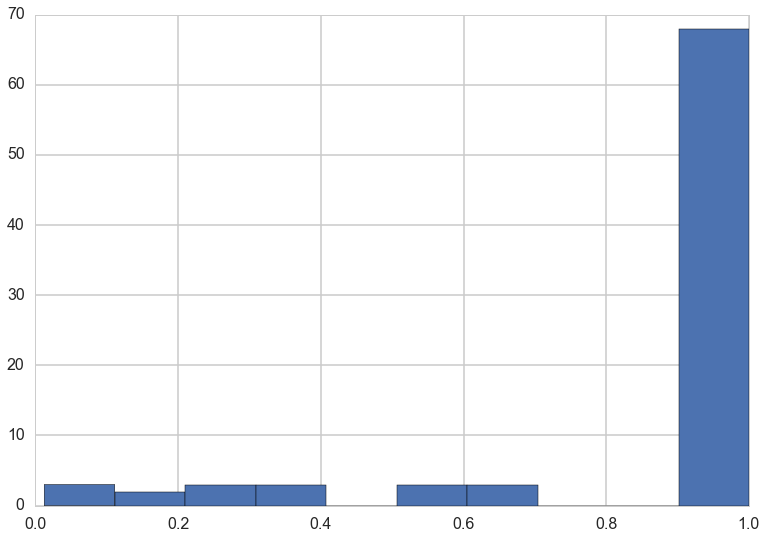

In [41]:
plt.hist(y)

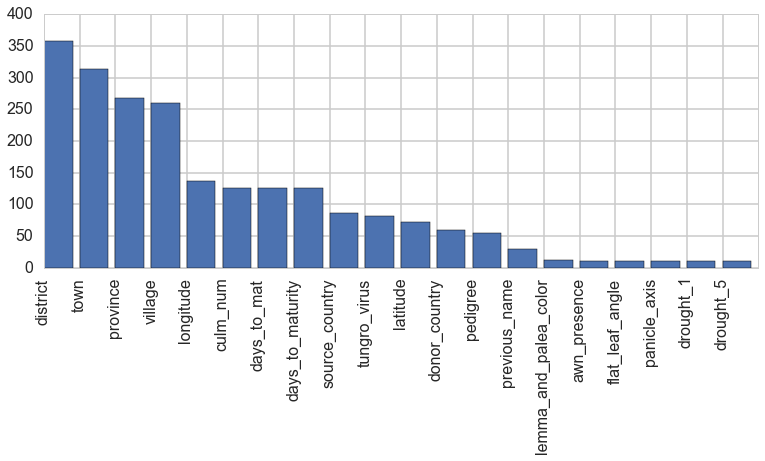

In [141]:
plt.bar(xrange(0,20),y[:20])
plt.xticks(xrange(0,20),(x[:20]),rotation='vertical',);
plt.subplots_adjust(bottom=0.5)

In [128]:
eda_df['tungro_virus']

0         0
1        93
2         0
3         0
4         0
5         0
6        72
7        90
8         0
9        81
10       69
11       50
12       77
13       50
14       84
15       54
16       70
17       53
18       45
19       86
20       58
21       94
22       51
23       79
24       69
25      100
26       87
27       88
28       85
29       71
       ... 
2317      0
2318      0
2319      0
2320      0
2321     45
2322     71
2323     96
2324     80
2325      0
2326      0
2327      0
2328      0
2329      0
2330      0
2331      0
2332      0
2333      0
2334     41
2335      0
2336      0
2337      0
2338      0
2339      0
2340      0
2341      0
2342      0
2343      0
2344      0
2345      0
2346      0
Name: tungro_virus, dtype: int64